### Create iceberg melt runoff forcing file based on output from experiment with icebergs ON

In [1]:
import xarray as xr
import numpy as np
import gsw
import cmocean
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob
import sys
sys.path.append('/home/users/birgal/')

In [2]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
nemo_mesh= f'{base_dir}bathymetry/mesh_mask-20240305.nc'

In [5]:
source='SOSE'; variable='PotTemp'
folder='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/boundary-conditions/B-SOSE/'
SOSE_interp   = xr.open_dataset(f'{folder}{source}-{variable}-BC-vertical-interp.nc')

In [9]:
nm = xr.open_dataset(nemo_mesh)

## Iceberg melt

In [16]:
year=2000
ds_on  = xr.open_dataset(f'{base_dir}output/ERA5_test10/files_spinup/eANT025.L121_1m_{year}0101_{year}1231_SBC.nc').isel(time_counter=10)
berg = xr.open_dataset(f'{base_dir}eANT025-orig/eANT025.L121-OPM026_y1979_bergmelt.nc')

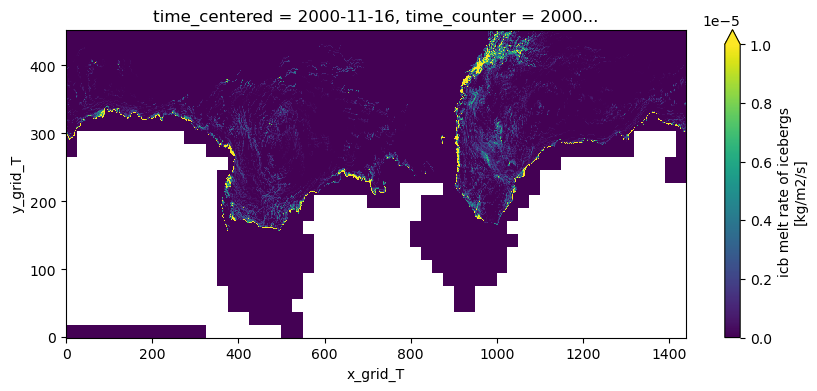

In [26]:
#iceberg_cea --- water_flux_into_sea_water_from_icebergs (kg/m2/s) --- all NaN
#berg_melt --- icb melt rate of icebergs (kg/m2/s)
ds_on.berg_melt.plot(figsize=(10,4), vmin=0, vmax=1e-5)

In [27]:
ds_on.berg_melt

<xarray.DataArray 'berg_melt' (y_grid_T: 453, x_grid_T: 1440)> Size: 3MB
[652320 values with dtype=float32]
Coordinates:
    nav_lat_grid_T  (y_grid_T, x_grid_T) float32 3MB ...
    nav_lon_grid_T  (y_grid_T, x_grid_T) float32 3MB ...
    time_centered   datetime64[ns] 8B ...
    time_counter    datetime64[ns] 8B 2000-11-16
Dimensions without coordinates: y_grid_T, x_grid_T
Attributes:
    long_name:           icb melt rate of icebergs
    units:               kg/m2/s
    online_operation:    average
    interval_operation:  1350 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1350 s)
    cell_measures:       area: area_grid_T

In [28]:
for year in range(1979,2016):
    ds_on  = xr.open_dataset(f'{base_dir}output/ERA5_test10/files_spinup/eANT025.L121_1m_{year}0101_{year}1231_SBC.nc')
    (ds_on.berg_melt).to_netcdf(f'{base_dir}misc-forcing/AntArc_ERA5_test10_bergmelt_y{year}.nc')

In [30]:
# depth over which runoff is applied:

ds_on.berg_melt.max()


<xarray.DataArray 'berg_melt' ()> Size: 8B
array(0.00122198)

In [31]:
SOSE_interp   = xr.open_dataset(f'{base_dir}boundary-conditions/B-SOSE/temp/SOSE-PotTemp-BC-vertical-interp.nc')

In [32]:
SOSE_interp

<xarray.Dataset> Size: 1MB
Dimensions:   (z: 121, y: 1, x: 1440)
Dimensions without coordinates: z, y, x
Data variables:
    ConsTemp  (z, y, x) float64 1MB ...

In [34]:
23360*1350/(24*3600)

365.0

In [36]:
32*24*3600/1350

2048.0

In [ ]:
90*1350/(24(36--)